In [239]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [240]:
import pandas as pd

url = ('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
ins = pd.read_csv(url)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [241]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [242]:
ins['region'].value_counts().sort_values(ascending=False)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [243]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [244]:
import matplotlib.pyplot as plt 

data_tf = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }

ins_en = ins.copy()
ins_en.replace(data_tf, inplace=True)
ins_en.corr().style.background_gradient(cmap='Blues')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


We can identify some type of linear association between Smoker & Charges. There is no signs of multicollinarity withing the matrix. 

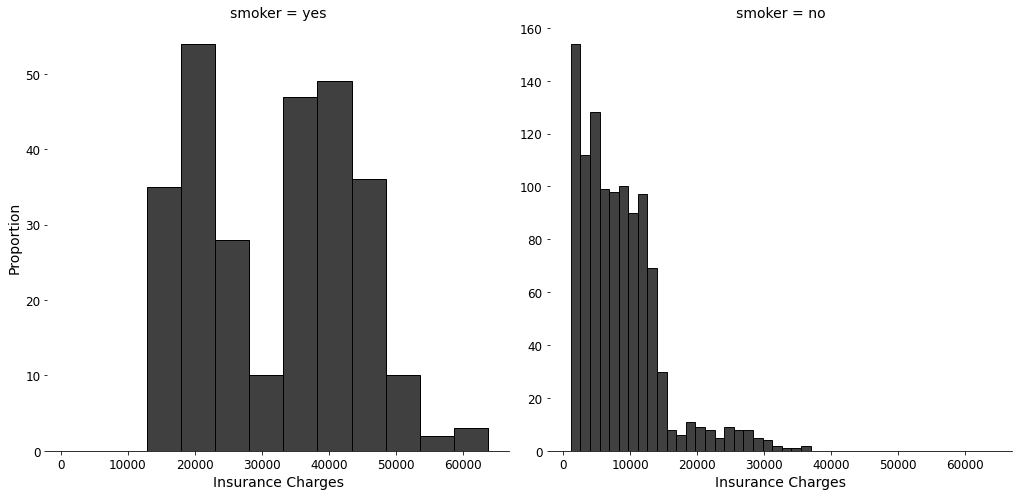

In [245]:
import seaborn as sns

X = sns.FacetGrid(ins, col="smoker", height = 7, sharey = False, sharex = True)
X.map(sns.histplot, "charges", color = 'black');
X.set_axis_labels("Insurance Charges", "Proportion");
X.despine(left=True)

Text(0.5, 1.0, 'Age VS Charge')

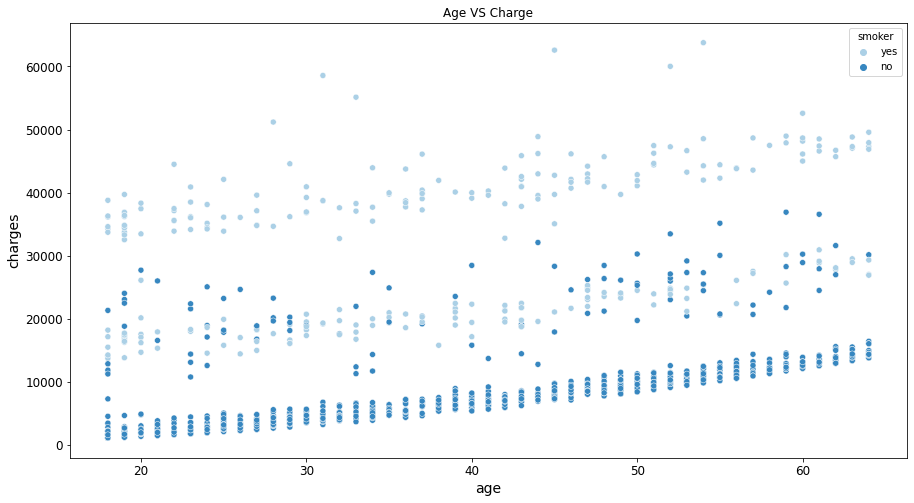

In [246]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age',y='charges',hue='smoker',data=ins,palette='Blues')
plt.title('Age VS Charge')

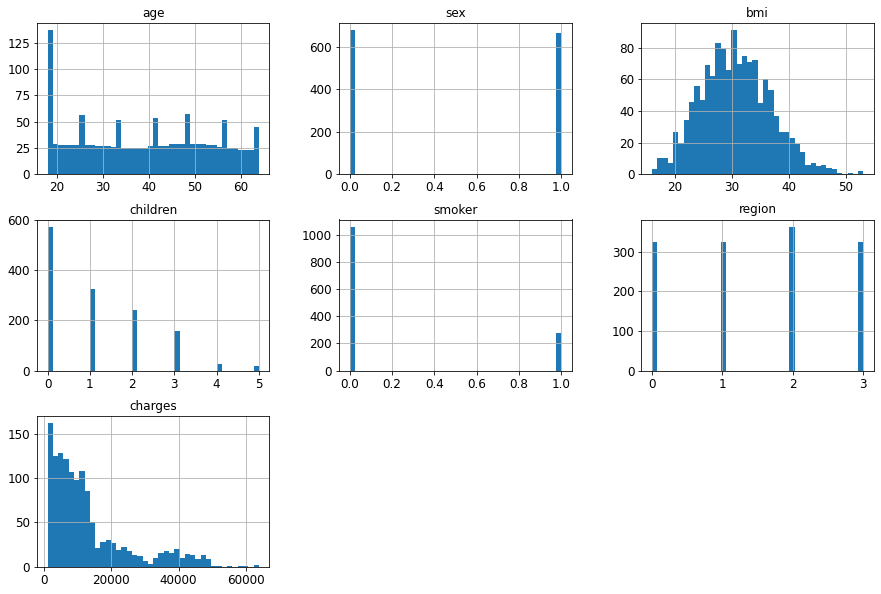

In [247]:
ins_en.hist(bins = 40, figsize=(15,10))
plt.show()

In [248]:
for col in list(ins_en.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,ins_en[col].skew(),ins_en[col].kurt()))

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


In [249]:
#Setting seed
np.random.seed(42)

In [250]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ins, test_size=0.2, random_state=42)

In [251]:
old_ins = ins.copy()
ins = train_set.drop('charges', axis = 1)
ins_lbls = train_set['charges'].copy()

x_test = test_set.drop('charges', axis = 1)
y_test = test_set['charges'].copy()

In [252]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [253]:
numeric_ = ins.drop(ins[['sex', 'smoker', 'region']], axis= 1)
numeric_.head()

,age,bmi,children
560,46,19.95,2
1285,47,24.32,0
1142,52,24.86,0
969,39,34.32,5
486,54,21.47,3


In [254]:
imputer.fit(numeric_)

SimpleImputer()

In [255]:
imputer.statistics_

array([39.35700935, 30.5603972 ,  1.10747664])

In [256]:
ins.mean().values

array([39.35700935, 30.5603972 ,  1.10747664])

In [257]:
from sklearn.preprocessing import OrdinalEncoder

category_ = ins[['sex', 'smoker', 'region']]
o_encoder = OrdinalEncoder()
ins_region_encoded = o_encoder.fit_transform(category_)
ins_region_encoded[:10]

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 2.],
       [0., 0., 2.],
       [0., 0., 1.],
       [1., 0., 2.],
       [0., 0., 3.],
       [1., 1., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

In [258]:
o_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [259]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder(sparse=False)
category_1hot = category_encoder.fit_transform(category_)
category_1hot

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [260]:
category_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [261]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler',StandardScaler()),
])

ins_numeric = numeric_pipeline.fit_transform(numeric_)
ins_numeric

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [262]:
from sklearn.compose import ColumnTransformer

numeric_attr = list(numeric_)
cat_attr = ['sex', 'smoker', 'region']

Final_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numeric_attr),
    ('cat', OneHotEncoder(), cat_attr),
])

f_ins = Final_pipeline.fit_transform(ins)
x_test = Final_pipeline.fit_transform(x_test)

In [263]:
f_ins.shape

(1070, 11)

In [264]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

print('Linear Regression :',cross_val_score(LinearRegression(), x_test, y_test, cv=7, scoring='r2').mean())
print('Random Forest Regression :', cross_val_score(RandomForestRegressor(), x_test, y_test, cv=7, scoring='r2').mean())
print('Gradient Boosting Regressor :',cross_val_score(GradientBoostingRegressor(), x_test, y_test, cv=7, scoring='r2').mean())

Linear Regression : 0.751020640653144
Random Forest Regression : 0.8435495003246559
Gradient Boosting Regressor : 0.834034459261562


In [265]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(f_ins, ins_lbls)


# Testing a small sample before getting started
sampl = ins.iloc[:10]
sampl_lbls = ins_lbls.iloc[:10]
sampl_prep = Final_pipeline.transform(sampl)

LR.predict(sampl_prep)

array([ 7360.,  8576.,  9664., 11392., 10368., 17920.,  1088., 23488.,
       12672., 32896.])

In [266]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LR_pred = LR.predict(f_ins)

print('Linear Regression Model Results\n')
print('Training Set Results')

LR_r2 = r2_score(ins_lbls, LR_pred)
print('R2 :', LR_r2)

LR_MSE = mean_squared_error(ins_lbls, LR_pred)
LR_RMSE = np.sqrt(LR_MSE)
print('Root Mean Squared Error :',LR_RMSE)

LR_MAE = mean_absolute_error(ins_lbls, LR_pred)
print('Mean Absolute Error :',LR_MAE, '\n')

LR_pred_test = LR.predict(x_test)
print('Test Set Results')

LR_r2_test = r2_score(y_test, LR_pred_test)
print('R2 :', LR_r2_test)

LR_MSE_test = mean_squared_error(y_test, LR_pred_test)
LR_RMSE_test = np.sqrt(LR_MSE_test)
print('Root Mean Squared Error :',LR_RMSE_test)

LR_MAE_test = mean_absolute_error(y_test, LR_pred_test)
print('Mean Absolute Error :',LR_MAE_test)

Linear Regression Model Results

Training Set Results
R2 : 0.7413740802682922
Root Mean Squared Error : 6109.698496707423
Mean Absolute Error : 4252.620285093458 

Test Set Results
R2 : 0.7814368032409849
Root Mean Squared Error : 5825.08875877647
Mean Absolute Error : 4239.5751591380595


In [267]:
from sklearn.tree import DecisionTreeRegressor

Dt_reg = DecisionTreeRegressor(random_state=42)
Dt_reg.fit(f_ins, ins_lbls)

Dt_pred = Dt_reg.predict(f_ins)

print('Descision Tree Model Results\n')
print('Training Set Results')

DT_r2 = r2_score(ins_lbls, Dt_pred)
print('R2 :', DT_r2)

Dt_MSE = mean_squared_error(ins_lbls, Dt_pred)
Dt_RMSE = np.sqrt(Dt_MSE)
print('Root Mean Squared Error :',Dt_RMSE)

DT_MAE = mean_absolute_error(ins_lbls, Dt_pred)
print('Mean Absolute Error :',DT_MAE, '\n')


DT_pred_test = Dt_reg.predict(x_test)
print('Test Set Results')

DT_r2_test = r2_score(y_test, DT_pred_test)
print('R2 :', DT_r2_test)

DT_MSE_test = mean_squared_error(y_test, DT_pred_test)
DT_RMSE_test = np.sqrt(DT_MSE_test)
print('Root Mean Squared Error :',DT_RMSE_test)

DT_MAE_test = mean_absolute_error(y_test, DT_pred_test)
print('Mean Absolute Error :',DT_MAE_test)

Descision Tree Model Results

Training Set Results
R2 : 0.9983078124756305
Root Mean Squared Error : 494.20598375812835
Mean Absolute Error : 29.572515327102803 

Test Set Results
R2 : 0.7840853610574918
Root Mean Squared Error : 5789.686848727543
Mean Absolute Error : 2745.982790097015


In [268]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=65, random_state=42)
RF.fit(f_ins, ins_lbls)

RF_pred = RF.predict(f_ins)

print('Random Forest Model Results\n')
print('Training Set Results')

RF_r2 = r2_score(ins_lbls, RF_pred)
print('R2 :', DT_r2)

RF_MSE = mean_squared_error(ins_lbls, RF_pred)
RF_RMSE = np.sqrt(RF_MSE)
print('Root Mean Squared Error :',RF_RMSE)

RF_MAE = mean_absolute_error(ins_lbls, RF_pred)
print('Mean Absolute Error :',RF_MAE, '\n')


RF_pred_test = RF.predict(x_test)
print('Test Set Results')

RF2_r2_test = r2_score(y_test, RF_pred_test)
print('R2 :', RF2_r2_test)

RF2_MSE_test = mean_squared_error(y_test, RF_pred_test)
RF2_RMSE_test = np.sqrt(RF2_MSE_test)
print('Root Mean Squared Error :',RF2_RMSE_test)

RF2_MAE_test = mean_absolute_error(y_test, RF_pred_test)
print('Mean Absolute Error :',RF2_MAE_test)


Random Forest Model Results

Training Set Results
R2 : 0.9983078124756305
Root Mean Squared Error : 1935.5185302066884
Mean Absolute Error : 1047.2385879121873 

Test Set Results
R2 : 0.8605524442859938
Root Mean Squared Error : 4652.85462208179
Mean Absolute Error : 2738.7131938440966


In [269]:
from sklearn.ensemble import GradientBoostingRegressor

GB_R = GradientBoostingRegressor(random_state=42)
GB_R.fit(f_ins, ins_lbls)

GB_R_pred = GB_R.predict(f_ins)

print('Gradient Boosting Model Results\n')
print('Training Set Results')

GB_R_r2 = r2_score(ins_lbls, GB_R_pred)
print('R2 :', GB_R_r2)

GB_R_MSE = mean_squared_error(ins_lbls, GB_R_pred)
GB_R_RMSE = np.sqrt(GB_R_MSE)
print('Root Mean Squared Error :',GB_R_RMSE)

GB_R_MAE = mean_absolute_error(ins_lbls, GB_R_pred)
print('Mean Absolute Error :',GB_R_MAE, '\n')


GB_R_pred_test = GB_R.predict(x_test)
print('Test Set Results')

GB_R2_r2_test = r2_score(y_test, GB_R_pred_test)
print('R2 :', GB_R2_r2_test)

GB_R2_MSE_test = mean_squared_error(y_test, GB_R_pred_test)
GB_R2_RMSE_test = np.sqrt(GB_R2_MSE_test)
print('Root Mean Squared Error :',GB_R2_RMSE_test)

GB_R2_MAE_test = mean_absolute_error(y_test, GB_R_pred_test)
print('Mean Absolute Error :',GB_R2_MAE_test)

Gradient Boosting Model Results

Training Set Results
R2 : 0.8997306137069336
Root Mean Squared Error : 3804.2402254184985
Mean Absolute Error : 2096.939346903854 

Test Set Results
R2 : 0.8766235174335019
Root Mean Squared Error : 4376.533150150441
Mean Absolute Error : 2600.501726609876
